<a href="https://colab.research.google.com/github/BryanSouza91/COVID-19/blob/master/COVID-19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is only the tested and reported cases John Hopkins CCSE has data for this is by no means a definitive view of the global epidemic.

##### The repo is updated daily around 5:00pm PDT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
confirmed_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

recovered_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

deaths_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [0]:
conf_df = pd.read_csv(confirmed_url) # ,index_col=['Province/State', 'Country/Region', 'Lat', 'Long']) 

recv_df = pd.read_csv(recovered_url) # ,index_col=['Province/State', 'Country/Region', 'Lat', 'Long'])

death_df = pd.read_csv(deaths_url) # ,index_col=['Province/State', 'Country/Region', 'Lat', 'Long'])

In [4]:
latest = conf_df.columns[-1]
latest

'5/22/20'

In [0]:
# create a differenced series function

def difference(dataset, interval=1):
    return pd.Series([dataset[i] - dataset[i - interval] for i in range(interval, len(dataset))])


# Plots total confirmed cases by country

##### Changing the logx=False to True shows the logarithmic scales of x-axis
##### Changing the logy=False to True shows the logarithmic scales of y-axis
##### Changing the loglog=False to True shows the logarithmic scales of both axes

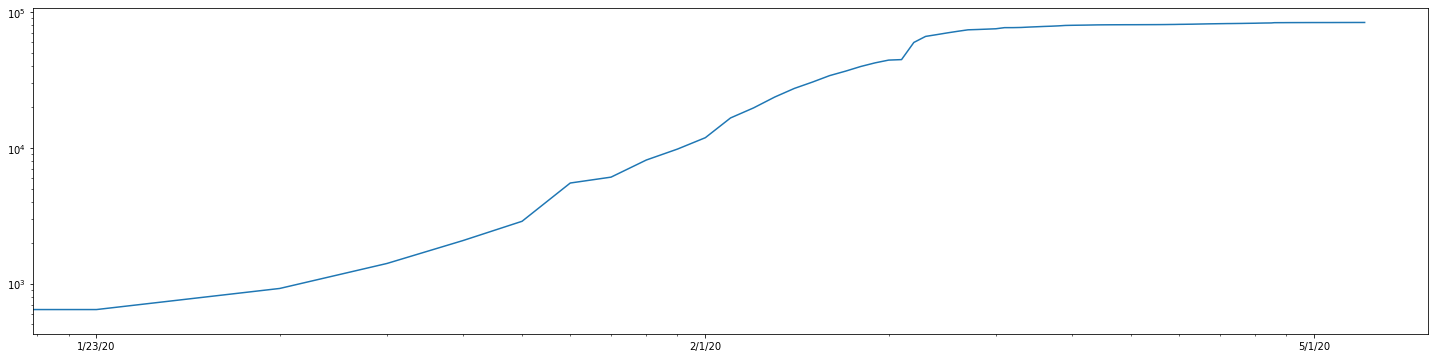

In [6]:
conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == 'China'].sum().plot(figsize=(25,6),logx=False,logy=False,loglog=True);

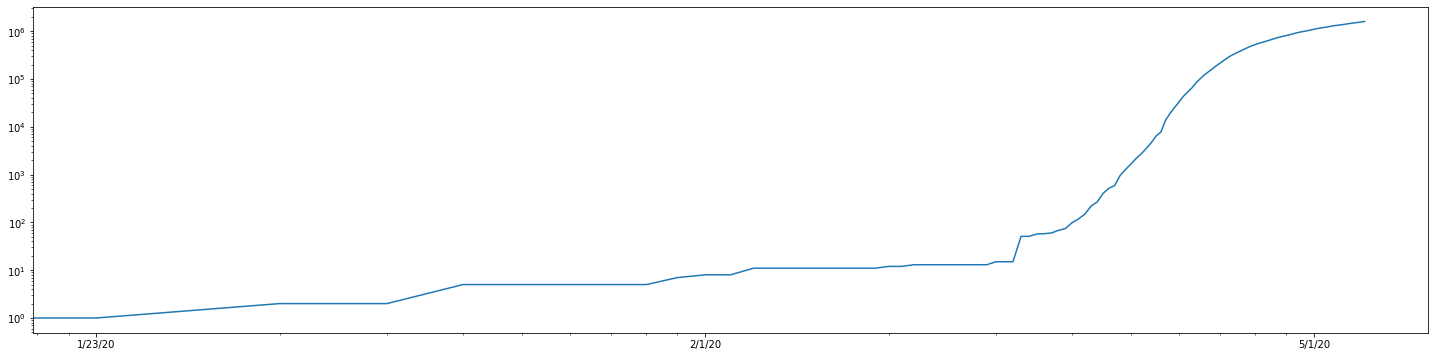

In [10]:
conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == 'US'].sum().plot(figsize=(25,6),logx=False,logy=False,loglog=True);

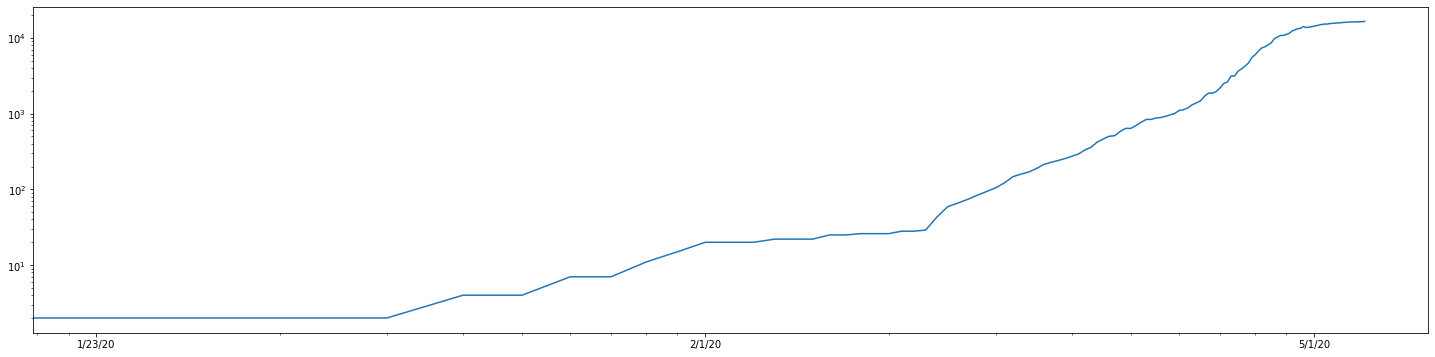

In [11]:
conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == 'Japan'].sum().plot(figsize=(25,6),logx=False,logy=False,loglog=True);

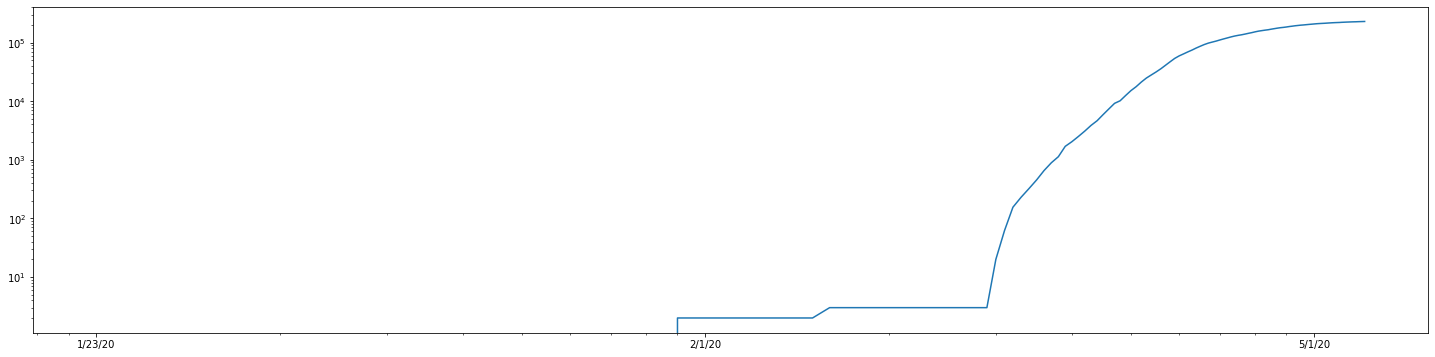

In [12]:
conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == 'Italy'].sum().plot(figsize=(25,6),logx=False,logy=False,loglog=True);

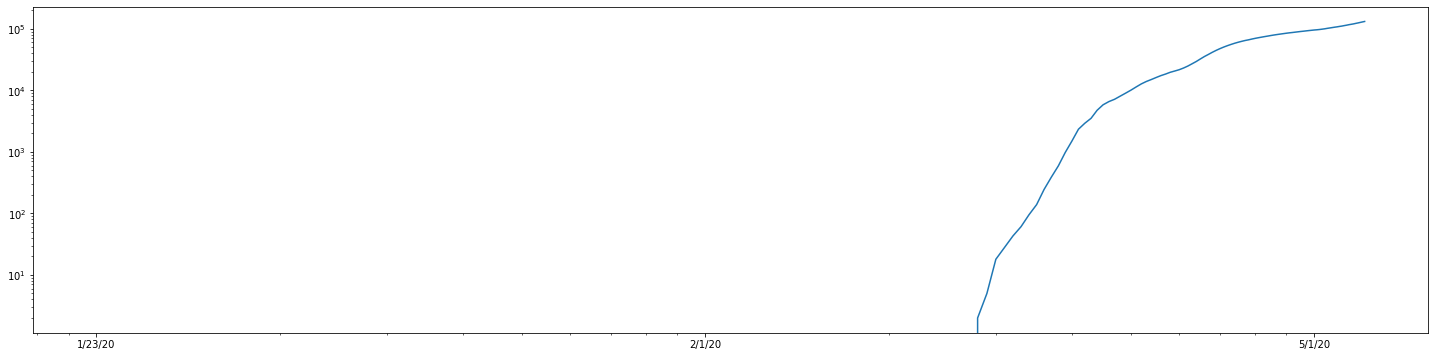

In [13]:
conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == 'Iran'].sum().plot(figsize=(25,6),logx=False,logy=False,loglog=True);

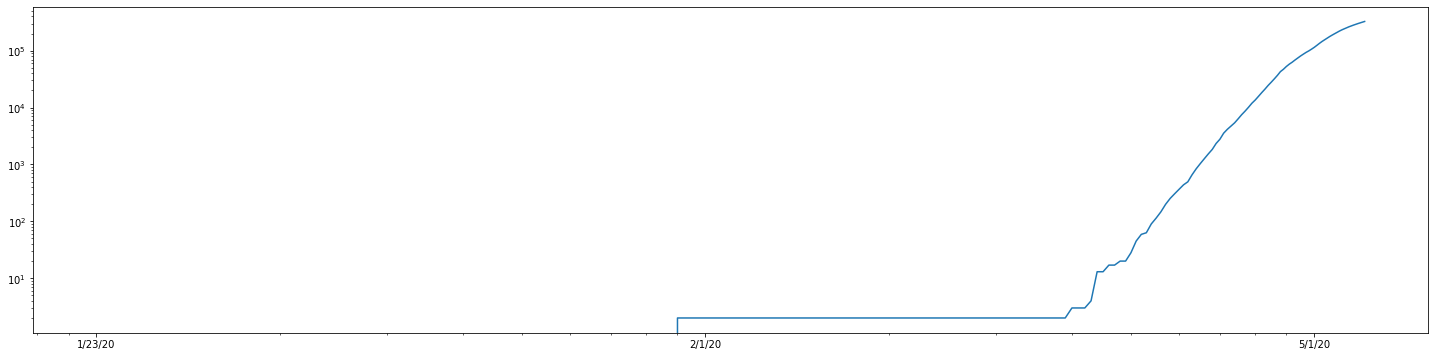

In [14]:
conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == 'Russia'].sum().plot(figsize=(25,6),logx=False,logy=False,loglog=True);

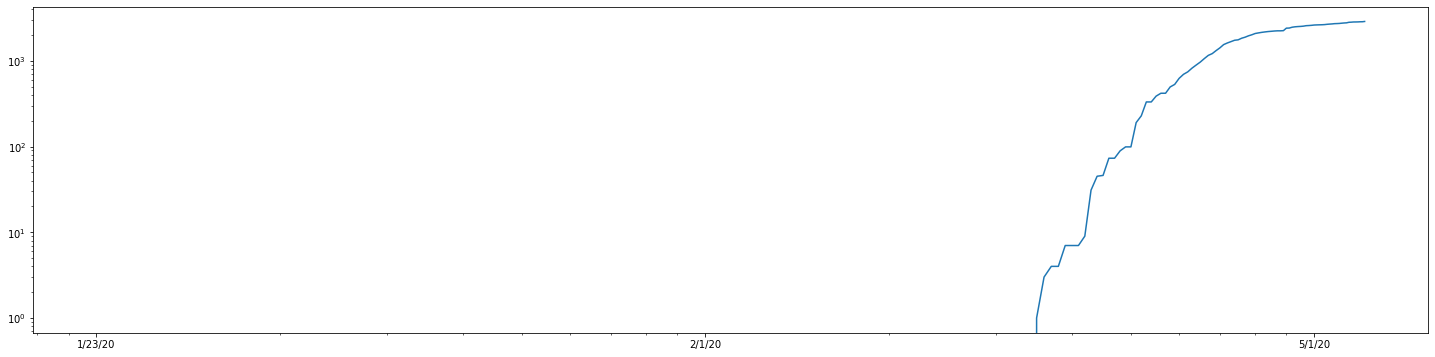

In [15]:
conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == 'Greece'].sum().plot(figsize=(25,6),logx=False,logy=False,loglog=True);

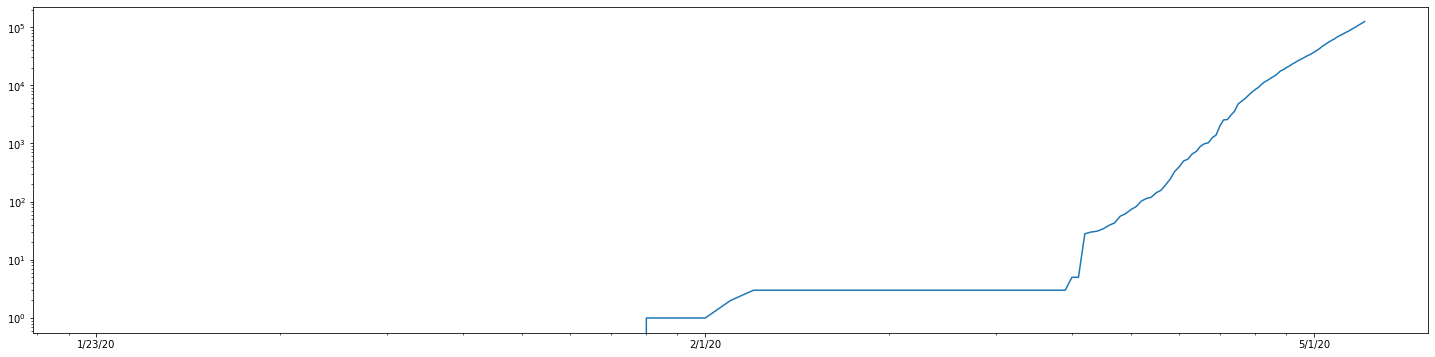

In [16]:
conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == 'India'].sum().plot(figsize=(25,6),logx=False,logy=False,loglog=True);

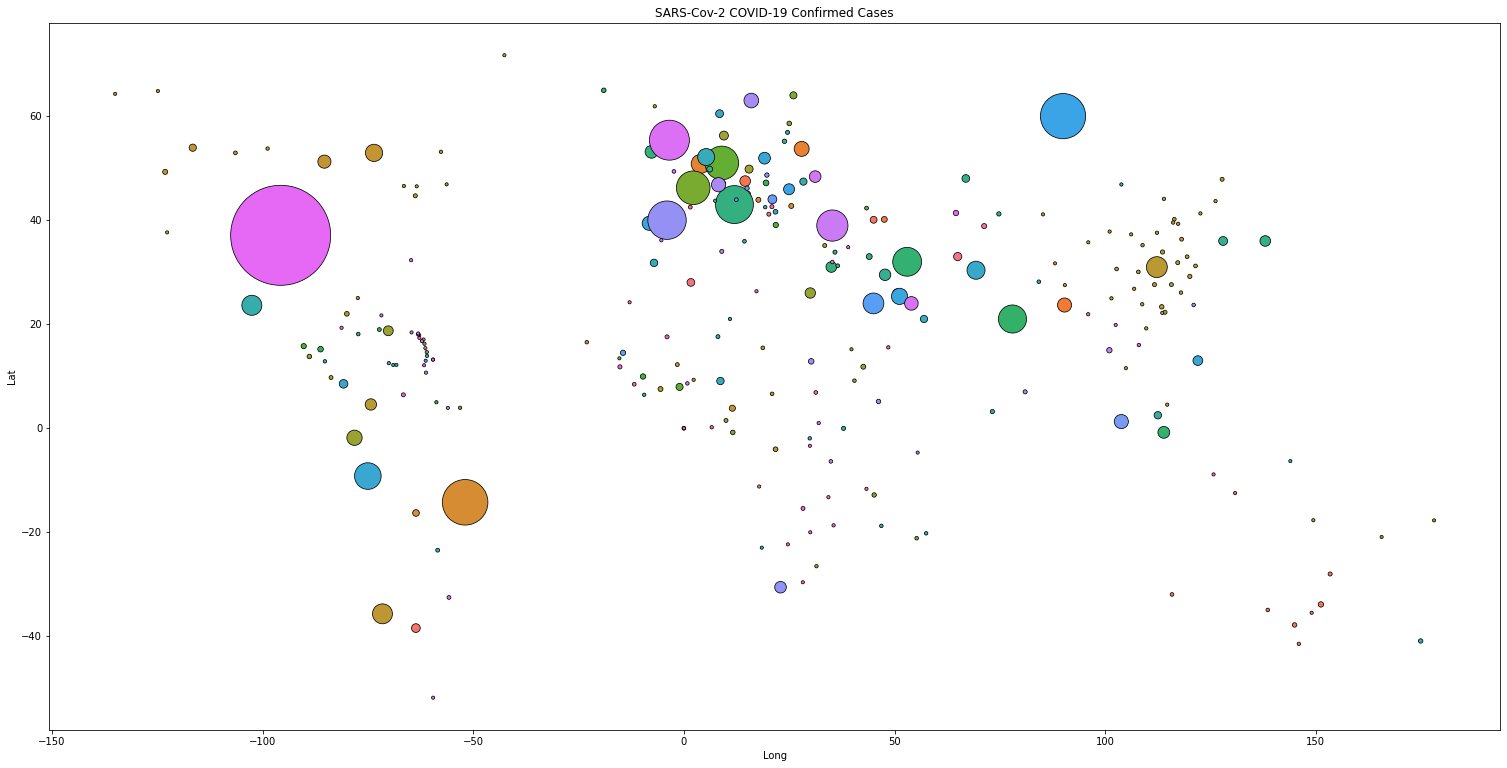

In [17]:
plt.figure(figsize=(26,13))
plt.title("SARS-Cov-2 COVID-19 Confirmed Cases")
sns.set_palette('colorblind')
sns.scatterplot(x='Long',y='Lat',size=latest,hue='Country/Region',data=conf_df,sizes=(10,10000),legend=False,edgecolor='k');

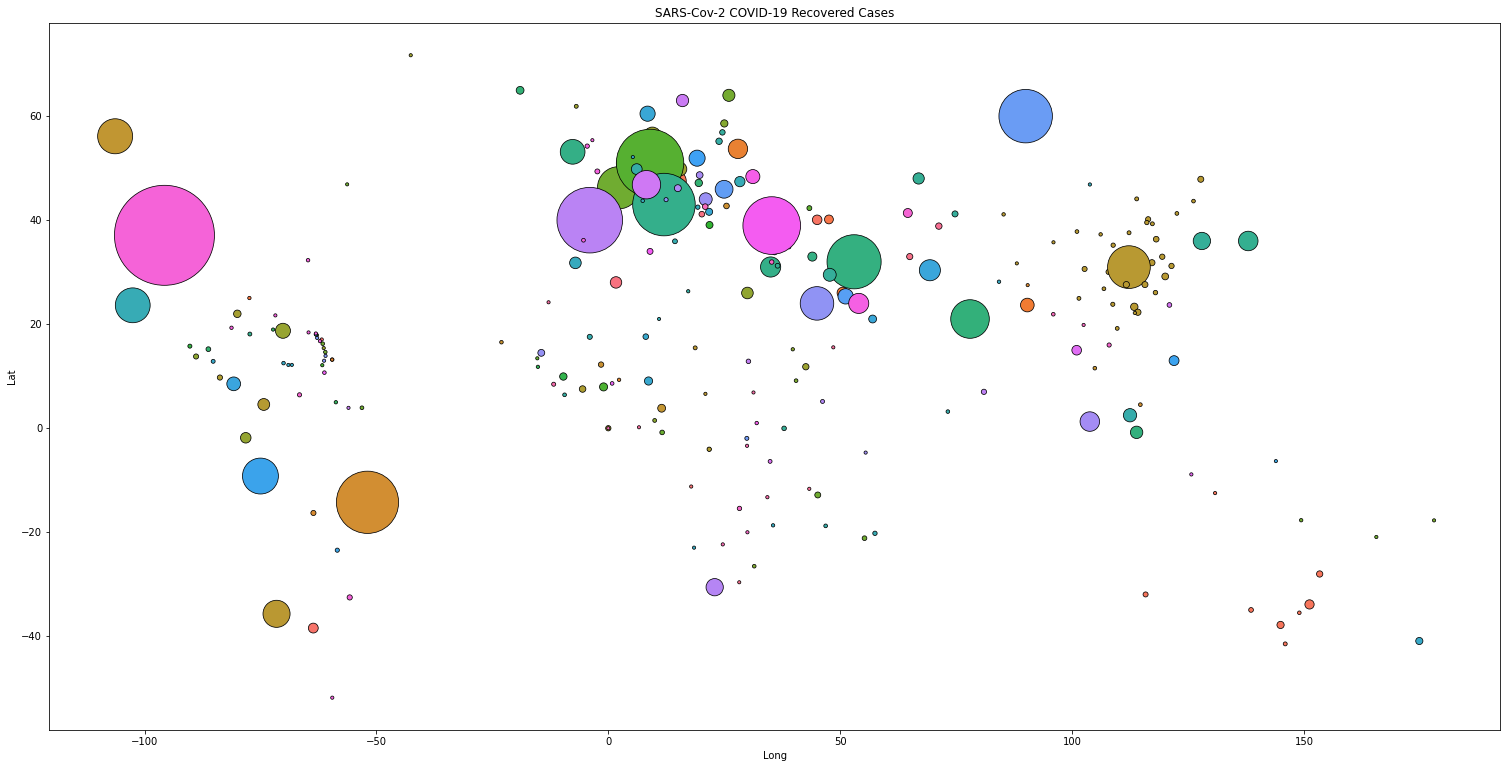

In [18]:
plt.figure(figsize=(26,13))
plt.title("SARS-Cov-2 COVID-19 Recovered Cases")
sns.set_palette('colorblind')
sns.scatterplot(x='Long',y='Lat',size=latest,hue='Country/Region',data=recv_df,sizes=(10,10000),legend=False,edgecolor='k');

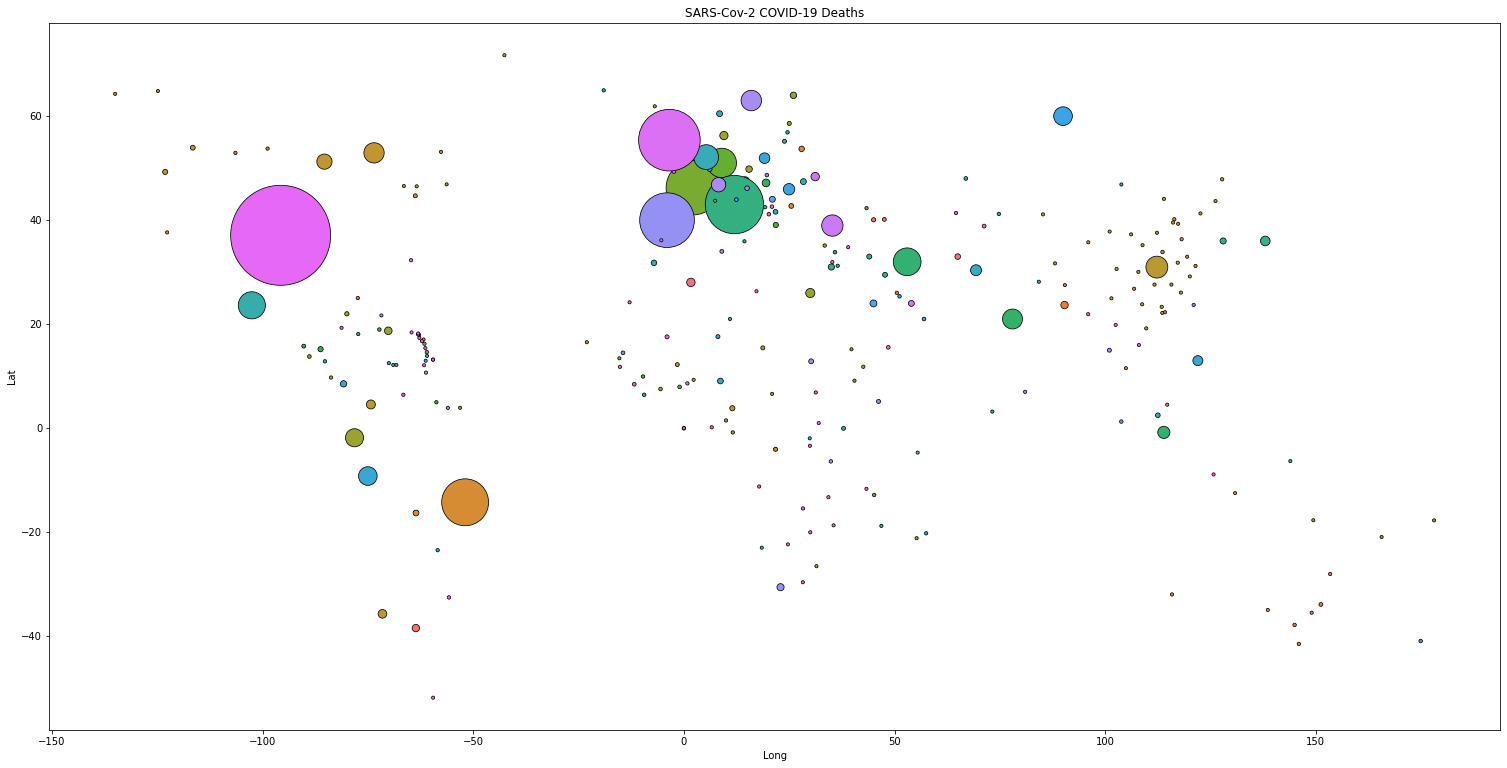

In [19]:
plt.figure(figsize=(26,13))
plt.title("SARS-Cov-2 COVID-19 Deaths")
sns.set_palette('colorblind')
sns.scatterplot(x='Long',y='Lat',size=latest,hue='Country/Region',data=death_df,sizes=(10,10000),legend=False,edgecolor='k');

# World report

In [0]:

# Create reusable series objects 
conf_sum = conf_df.loc[:,'1/22/20':].sum()
recv_sum = recv_df.loc[:,'1/22/20':].sum()
death_sum = death_df.loc[:,'1/22/20':].sum()

conf_sum_dif = difference(conf_sum, 1).values
recv_sum_dif = difference(recv_sum, 1).values
death_sum_dif = difference(death_sum, 1).values

In [27]:
# Print world report
print("World numbers current as of {}".format(conf_df.columns[-1]))
print("New cases:                                          {}".format(conf_sum_dif[-1]))
print("Total confirmed cases:                              {}".format(conf_sum[-1]))
print("New case rate:                                      {0:>.3%}".format(conf_sum_dif[-1] / conf_sum[-2]))
print("New case 7-day Moving Average:                      {0:>.0f}".format(difference(conf_sum, 1).rolling(7).mean().values[-1]))
print("New case 30-day Moving Average:                     {0:>.0f}".format(difference(conf_sum, 1).rolling(30).mean().values[-1]))
print("New Recovered cases:                                {}".format(recv_sum_dif[-1]))
print("Total recovered cases:                              {}".format(recv_sum[-1]))
print("Recovery rate:                                      {0:>.3%}".format(recv_sum[-1]/conf_sum[-1]))
print("New Deaths:                                         {}".format(death_sum_dif[-1]))
print("Total deaths:                                       {}".format(death_sum[-1]))
print("Death rate:                                         {0:>.3%}".format(death_sum[-1]/conf_sum[-1]))
print("Deaths as percentage of Total Resolved:             {0:.3%}".format((death_sum[-1]/(recv_sum[-1] + death_sum[-1]))))
print()
print()
print("Growth rate above 1.0 is sign of exponential growth, but also skewed by increased testing.")
print("World Growth rate:                                 {0:>.4}".format((conf_sum_dif[-1])/(conf_sum_dif[-2])))

World numbers current as of 5/22/20
New cases:                                          108393
Total confirmed cases:                              5210817
New case rate:                                      2.124%
New case 7-day Moving Average:                      95496
New case 30-day Moving Average:                     86207
New Recovered cases:                                107904
Total recovered cases:                              2056643
Recovery rate:                                      39.469%
New Deaths:                                         5236
Total deaths:                                       338160
Death rate:                                         6.490%
Deaths as percentage of Total Resolved:             14.121%


Growth rate above 1.0 is sign of exponential growth, but also skewed by increased testing.
World Growth rate:                                 1.023


# Report for each country reporting cases


In [0]:
# define report function
def report(country):
    # Create reusable series objects 
    country_conf_sum = conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == country].sum()
    country_recv_sum = recv_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == country].sum()
    country_death_sum = death_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == country].sum()

    country_conf_sum_dif = difference(country_conf_sum, 1).values
    country_recv_sum_dif = difference(country_recv_sum, 1).values
    country_death_sum_dif = difference(country_death_sum, 1).values

    print()
    print('_'*60)
    print("Numbers for {} current as of {}".format(country, conf_df.columns[-1]))
    print()
    print("New cases:                                           {}".format(country_conf_sum_dif[-1]))
    print("Total confirmed cases:                               {}".format(country_conf_sum[-1]))
    print("New case rate:                                       {0:>.3%}".format(country_conf_sum_dif[-1]/country_conf_sum[-1]))
    print("New case 7-day Moving Average:                       {0:>.0f}".format(difference(country_conf_sum, 1).rolling(7).mean().values[-1]))
    print("New case 30-day Moving Average:                      {0:>.0f}".format(difference(country_conf_sum, 1).rolling(30).mean().values[-1]))
    print("New Recovered cases:                                 {}".format(country_recv_sum_dif[-1]))
    print("Total recovered cases:                               {}".format(country_recv_sum[-1]))
    print("Recovery rate:                                       {0:>.3%}".format(country_recv_sum_dif[-1]/country_recv_sum[-1]))
    print("New Deaths:                                          {}".format(country_death_sum_dif[-1]))
    print("Total deaths:                                        {}".format(country_death_sum[-1]))
    print("Death rate:                                          {0:>.3%}".format(country_death_sum_dif[-1]/country_conf_sum[-1]))
    print("Deaths as percentage of Total Resolved:              {0:.3%}".format((country_death_sum[-1]/(country_recv_sum[-1] + country_death_sum[-1]))))
    print()
    print()
    print("Growth rate:                                         {0:>.4}".format(country_conf_sum_dif[-1]/country_conf_sum_dif[-2]))
    print("_"*60)

In [29]:
report('US')


____________________________________________________________
Numbers for US current as of 5/22/20

New cases:                                           23790
Total confirmed cases:                               1600937
New case rate:                                       1.486%
New case 7-day Moving Average:                       22588
New case 30-day Moving Average:                      25353
New Recovered cases:                                 51717
Total recovered cases:                               350135
Recovery rate:                                       14.771%
New Deaths:                                          1277
Total deaths:                                        95979
Death rate:                                          0.080%
Deaths as percentage of Total Resolved:              21.514%


Growth rate:                                         0.9405
____________________________________________________________


In [30]:
report('Italy')


____________________________________________________________
Numbers for Italy current as of 5/22/20

New cases:                                           652
Total confirmed cases:                               228658
New case rate:                                       0.285%
New case 7-day Moving Average:                       682
New case 30-day Moving Average:                      1378
New Recovered cases:                                 32
Total recovered cases:                               10194
Recovery rate:                                       0.314%
New Deaths:                                          130
Total deaths:                                        32616
Death rate:                                          0.057%
Deaths as percentage of Total Resolved:              76.188%


Growth rate:                                         1.016
____________________________________________________________


In [31]:
for each in conf_df['Country/Region'].sort_values().unique():
    report(each)


____________________________________________________________
Numbers for Afghanistan current as of 5/22/20

New cases:                                           540
Total confirmed cases:                               9216
New case rate:                                       5.859%
New case 7-day Moving Average:                       452
New case 30-day Moving Average:                      268
New Recovered cases:                                 58
Total recovered cases:                               996
Recovery rate:                                       5.823%
New Deaths:                                          12
Total deaths:                                        205
Death rate:                                          0.130%
Deaths as percentage of Total Resolved:              17.069%


Growth rate:                                         1.017
____________________________________________________________

____________________________________________________________
Numbers for

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in long_scalars


New case 7-day Moving Average:                       47
New case 30-day Moving Average:                      50
New Recovered cases:                                 54
Total recovered cases:                               15005
Recovery rate:                                       0.360%
New Deaths:                                          2
Total deaths:                                        635
Death rate:                                          0.012%
Deaths as percentage of Total Resolved:              4.060%


Growth rate:                                         0.6275
____________________________________________________________

____________________________________________________________
Numbers for Azerbaijan current as of 5/22/20

New cases:                                           106
Total confirmed cases:                               3855
New case rate:                                       2.750%
New case 7-day Moving Average:                       125
New case 30-day Mo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


New case 30-day Moving Average:                      7
New Recovered cases:                                 42
Total recovered cases:                               769
Recovery rate:                                       5.462%
New Deaths:                                          0
Total deaths:                                        52
Death rate:                                          0.000%
Deaths as percentage of Total Resolved:              6.334%


Growth rate:                                         0.6667
____________________________________________________________

____________________________________________________________
Numbers for Burma current as of 5/22/20

New cases:                                           0
Total confirmed cases:                               199
New case rate:                                       0.000%
New case 7-day Moving Average:                       2
New case 30-day Moving Average:                      3
New Recovered cases:             

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in long_scalars



____________________________________________________________
Numbers for Cuba current as of 5/22/20

New cases:                                           8
Total confirmed cases:                               1916
New case rate:                                       0.418%
New case 7-day Moving Average:                       11
New case 30-day Moving Average:                      24
New Recovered cases:                                 0
Total recovered cases:                               3557
Recovery rate:                                       0.000%
New Deaths:                                          1
Total deaths:                                        81
Death rate:                                          0.052%
Deaths as percentage of Total Resolved:              2.226%


Growth rate:                                         1.0
____________________________________________________________

____________________________________________________________
Numbers for Cyprus current 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars



____________________________________________________________
Numbers for Libya current as of 5/22/20

New cases:                                           1
Total confirmed cases:                               72
New case rate:                                       1.389%
New case 7-day Moving Average:                       1
New case 30-day Moving Average:                      0
New Recovered cases:                                 0
Total recovered cases:                               19
Recovery rate:                                       0.000%
New Deaths:                                          0
Total deaths:                                        3
Death rate:                                          0.000%
Deaths as percentage of Total Resolved:              13.636%


Growth rate:                                         0.5
____________________________________________________________

____________________________________________________________
Numbers for Liechtenstein curren